In [9]:
import sys
sys.path.append("/Users/david/Documents/code/fhmm/v1")

In [10]:
from importlib import reload
from src.classifiers_davidjames9610.test_a.config import config_location
import importlib
import src.classifiers_davidjames9610.test_a.config as base_config
reload(base_config)
config = importlib.import_module(base_config.config_location)
reload(config)
print(config.basedir)
import time

/Users/david/Documents/code/fhmm/v1/src/classifiers_davidjames9610/test_a/whale_data


In [11]:
# time = 20 ms
# fs = 16000 = 1/t
# windows samples = 20 * 10^-3 * 1/1600
# = 0.2 * 1600 = 800

In [12]:
import pickle
import d_classifiers_to_results
import src.misc_davidjames9610.utils as utils
reload(d_classifiers_to_results)
sls = utils.load_pickle(config.samples_labels)

loading lp_GaussNoise_SNR20.pickle
loading lp_GaussNoise_SNR10.pickle
loading lp_RealNoise_UNDER_WATER_DRONE_SNR0.pickle
loading lp_None_None.pickle
loading lp_GaussNoise_SNR40.pickle
loading lp_RealNoise_UNDER_WATER_DRONE_SNR-10.pickle
loading lp_RealNoise_UNDER_WATER_DRONE_SNR10.pickle
loading lp_GaussNoise_SNR60.pickle
loading lp_RealNoise_UNDER_WATER_DRONE_SNR20.pickle
loading fhmm.pickle
Directory '/Users/david/Documents/code/fhmm/v1/src/classifiers_davidjames9610/test_a/whale_data/plots/classification_annotations/' already exists, removing old files:  False
type: classification_annotations
For classifier: fhmm
already saved: ['lp_GaussNoise_SNR20', 'lp_GaussNoise_SNR10', 'lp_RealNoise_UNDER_WATER_DRONE_SNR0', 'lp_GaussNoise_SNR40', 'lp_RealNoise_UNDER_WATER_DRONE_SNR-10', 'lp_RealNoise_UNDER_WATER_DRONE_SNR10', 'lp_GaussNoise_SNR60', 'lp_RealNoise_UNDER_WATER_DRONE_SNR20']
Directory '/Users/david/Documents/code/fhmm/v1/src/classifiers_davidjames9610/test_a/whale_data/results/clas

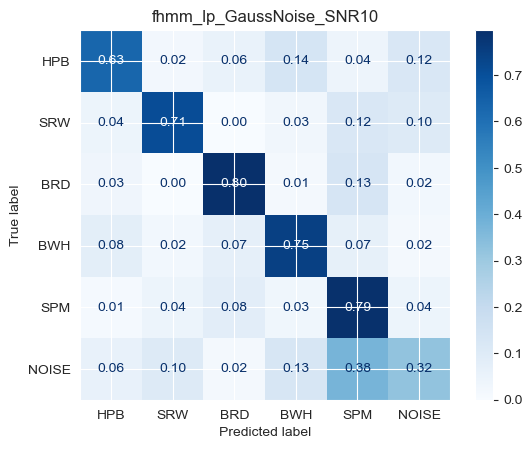

  Testing for: lp_GaussNoise_SNR20


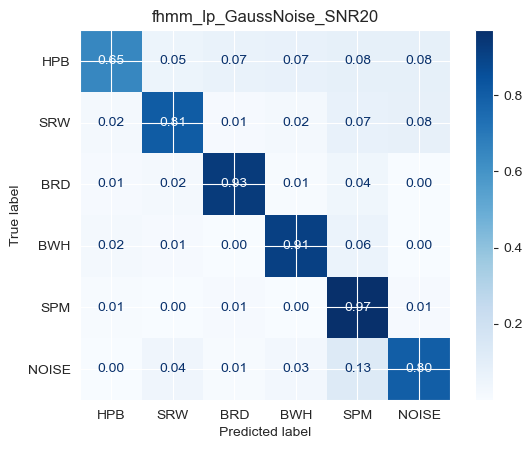

  Testing for: lp_GaussNoise_SNR40


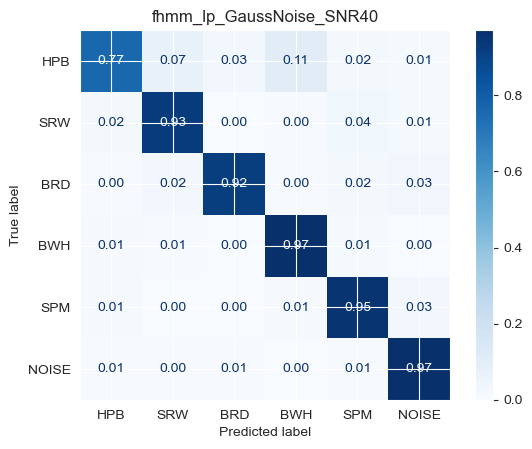

  Testing for: lp_GaussNoise_SNR60


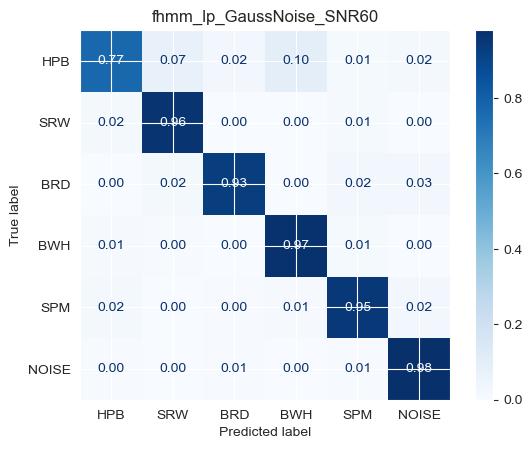

  Testing for: lp_RealNoise_UNDER_WATER_DRONE_SNR10


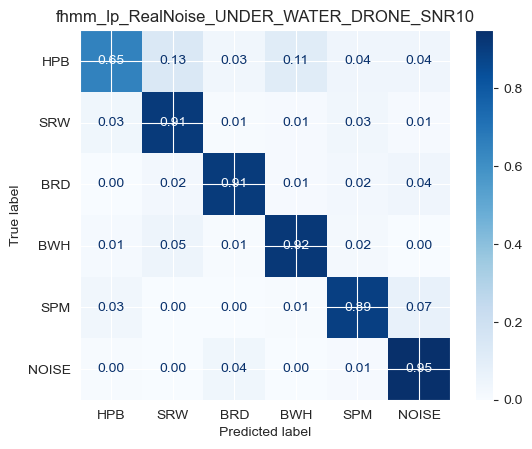

  Testing for: lp_RealNoise_UNDER_WATER_DRONE_SNR20


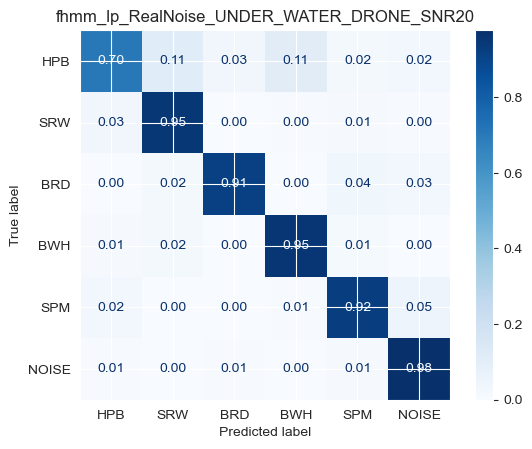

Directory '/Users/david/Documents/code/fhmm/v1/src/classifiers_davidjames9610/test_a/whale_data/results/classification_annotations_valg/fhmm' already exists, removing old files:  False
saving / updating  lp_GaussNoise_SNR10
saving / updating  lp_GaussNoise_SNR20
saving / updating  lp_GaussNoise_SNR40
saving / updating  lp_GaussNoise_SNR60
saving / updating  lp_RealNoise_UNDER_WATER_DRONE_SNR10
saving / updating  lp_RealNoise_UNDER_WATER_DRONE_SNR20
Execution time: 9.138841 seconds


In [15]:
import src.misc_davidjames9610.utils as utils
reload(utils)
reload(d_classifiers_to_results)

import d_classifiers_to_results
reload(d_classifiers_to_results)
reload(utils)

feature_keys = ['lp'] # ['lp', 'mfcc', 'lp']
classifier_keys = ['fhmm'] # ['GaussianHMM', 'GMMHMM', 'fhmm']

plot_cms = True
save_cms = True

for feature_key, classifier_key in zip(feature_keys, classifier_keys):
    results = {}
    # feature_key = 'lp'
    # classifier_key = 'fhmm'
    features = utils.folder_pickles_to_dict(config.basedir + '/features', feature_key)
    classifiers = utils.folder_pickles_to_dict(config.basedir + '/classifiers', classifier_key)

    include_buffer = False
    if include_buffer:
        d_classifiers_to_results.include_buffer_in_features(features, buffer_length=110, buffer_step=50)
        utils.dict_to_folder_pickles(config.basedir + '/features', features)

    start_time = time.time()

    result_types = [
        'classification_annotations',
        # 'classification_buffer',
        'classification_annotations_valg',
        # 'classification_buffer_valg',
        ]
    for result_type in result_types:
    # result_type = result_types[3]
        results[result_type] = d_classifiers_to_results.get_classification_results(
            features, classifiers, sls, config.basedir, result_type, plot_cm=plot_cms, save_plots=save_cms, new_results=False, clean_results_dir=False, clean_plot_results=False)

    end_time = time.time()
    print(f"Execution time: {end_time - start_time:.6f} seconds")